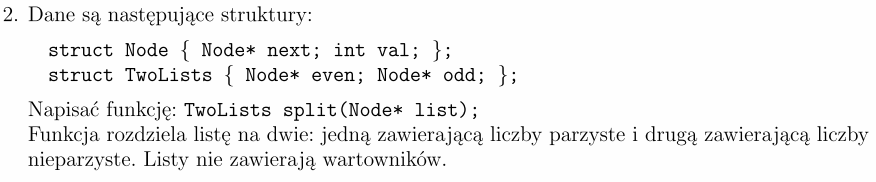

In [1]:
class Node:
    def __init__(self, val=None):
        self.val = val
        self.next = None
        

class TwoLists:
    def __init__(self):
        self.even = None
        self.odd = None
        
    def split(self, lst):
        if not lst: return
        # Leave the first node to the end
        prev = lst
        while prev.next:
            removed = self.remove_node(prev)
            # If is odd, add to odd values list
            if removed.val % 2:
                if not self.odd:
                    self.odd = removed
                    odd_tail = removed
                else:
                    odd_tail.next = removed
                    odd_tail = removed
            # If is even, add to even values list
            else:
                if not self.even:
                    self.even = removed
                    even_tail = removed
                else:
                    even_tail.next = removed
                    even_tail = removed
        # Set next nodes of the tails to None
        if self.even: even_tail.next = None
        if self.odd: odd_tail.next = None            
        # Decide where to insert the remaining node
        # (We will link it ad the first value to remain the
        # initial order)
        if lst.val % 2:
            lst.next = self.odd
            self.odd = lst
        else:
            lst.next = self.even
            self.even = lst

    def remove_node(self, prev_node):
        removed = prev_node.next
        prev_node.next = prev_node.next.next
        return removed

##### Pomocnicze funkcje

In [2]:
def create_linked_list(values: 'iterable' = None) -> 'linked list head (sentinel)':
    head = Node()  # A sentinel node
    if not values: return None
    head.next = curr = Node(values[0])
    for i in range(1, len(values)):
        curr.next = Node(values[i])
        curr = curr.next
    return head.next


def print_linked_list(ll_head: 'linked list head (sentinel)'):
    if ll_head:
        curr = ll_head.next
        print(ll_head.val, end=' ')
        while curr:
            print('->', curr.val, end=' ')
            curr = curr.next
        print()
    
        
def linked_list_to_list(ll_head: 'linked list head (sentinel)') -> list:
    values = []
    curr = ll_head
    while curr:
        values.append(curr.val)
        curr = curr.next
    return values

###### Kilka testów

In [3]:
import random

def test(counts):
    arr = [random.randint(-100, 100) for _ in range(random.randint(*counts))]
    ll = create_linked_list(arr)
    print('Array before:')
    print(arr)
    print('Linked list before:')
    print_linked_list(ll)
    print()
    tl = TwoLists()
    tl.split(ll)
    print('After splitting:')
    print('\nEven linked list:')
    print_linked_list(tl.even)
    print('\nOdd linked list:')
    print_linked_list(tl.odd)
    
    odds_lst = linked_list_to_list(tl.odd)
    even_lst = linked_list_to_list(tl.even)
    are_odds_correct = all(v % 2 for v in odds_lst)
    are_even_correct = all(not v % 2 for v in even_lst)
    is_length_correct = len(odds_lst) + len(even_lst) == len(arr)
    no_values_missed = not (set(odds_lst) | set(even_lst)).symmetric_difference(arr)
    print()
    print(are_odds_correct, are_even_correct, is_length_correct, no_values_missed)
    print('Is correct?:', are_even_correct and are_odds_correct and is_length_correct and no_values_missed)

In [4]:
test((0, 100))

Array before:
[-76, 9, -55, -92, -100, 44, 61, -30, -43, -67, -8, -38, 74, -99, -32, 86, 9, -10, -45, -72, -60, 14, 80, -39, -30, 12, 94, 30, -75, -54, 42, -62, 61, 41, -5, -79, -36, -73, -74, -26, -68, 36, 36, 27, -61, 84, 97, 21, 53, -62, -80, -3, -49, -84, 95, -57, 98, -67, -79, 25, 41, 41, -10, -22, 18, -24, 59, 26, -12, -89, 76, 60, 46, 33, -72, 53, -35, -93, 55, 20, -62, -86, -16, -80, 3, 76, -74, 70, -85, -88, 22, 94, -27, 36, -9, 17, 57, -89, 15, 11]
Linked list before:
-76 -> 9 -> -55 -> -92 -> -100 -> 44 -> 61 -> -30 -> -43 -> -67 -> -8 -> -38 -> 74 -> -99 -> -32 -> 86 -> 9 -> -10 -> -45 -> -72 -> -60 -> 14 -> 80 -> -39 -> -30 -> 12 -> 94 -> 30 -> -75 -> -54 -> 42 -> -62 -> 61 -> 41 -> -5 -> -79 -> -36 -> -73 -> -74 -> -26 -> -68 -> 36 -> 36 -> 27 -> -61 -> 84 -> 97 -> 21 -> 53 -> -62 -> -80 -> -3 -> -49 -> -84 -> 95 -> -57 -> 98 -> -67 -> -79 -> 25 -> 41 -> 41 -> -10 -> -22 -> 18 -> -24 -> 59 -> 26 -> -12 -> -89 -> 76 -> 60 -> 46 -> 33 -> -72 -> 53 -> -35 -> -93 -> 55 -> 20 